In [5]:
%matplotlib inline

import time
import copy
import numpy as np
from skimage.filters import gaussian_filter
import cv2

import matplotlib.pyplot as plt
import pylab as pl

from tifffile import imread, imsave
import cPickle as pickle

%reload_ext autoreload
%autoreload 2

from netsurface2d import NetSurf2d
from netsurface2dt import NetSurf2dt
from data3d import Data3d

---

# Loading RAW data

In [6]:
folder = '/Users/jug/Repositories/GIT/BobSeg/AmyMaddox/'
#folder = '/Users/maddox/Jug/Data/'

filename = folder + 'Reslice_of_298_crop.tif'
#filename = folder + 'Reslice_of_nd324_crop_16b.tif'

stack = imread(filename)
stack = stack / np.max(stack.astype(float))
print 'Stack shape:',stack.shape

sigma = [0.,3.,3.]
stack_smooth = gaussian_filter(stack,sigma)

Stack shape: (76, 395, 490)


/usr/local/lib/python2.7/site-packages/skimage/filters/_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):


### sanity check

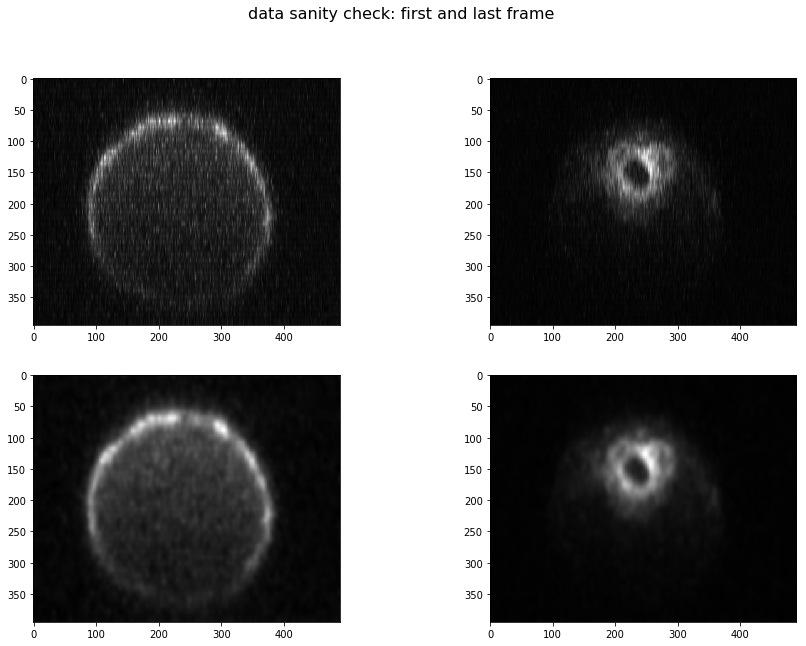

In [9]:
pl.rcParams['figure.figsize'] = (15, 10)

fig = plt.figure()
fig.suptitle('data sanity check: first and last frame', fontsize=16)
ax = fig.add_subplot(221)
ax.imshow(stack[0], plt.get_cmap('gray'))
ax = fig.add_subplot(222)
ax.imshow(stack[-1], plt.get_cmap('gray'))
ax = fig.add_subplot(223)
ax.imshow(stack_smooth[0], plt.get_cmap('gray'))
ax = fig.add_subplot(224)
ax.imshow(stack_smooth[-1], plt.get_cmap('gray'))

---

# Segmentation

You need to create an instance of the class ```Data3d```, here called ```data```.

For it we set how many radial columns it has and how many steps per column can be choosen later during segmentation.
The value for ```max_delta_k``` sais how many such steps two consecutive steps can differ at most.

If the explanation above does not make sense to you: leave the default values (72 columns, K=200, and max_delta_k=1).

In [25]:
data = Data3d( stack_smooth, pixelsize=(1.,1.), silent=False )
data.set_seg_params(num_columns=72,K=200,max_delta_k=2from moviemaker2d import MovieMaker2d
mm = MovieMaker2d(False)
frames, centers, all_polygones, radii = mm.draw_segmentation(data, stack, folder=None, inline=True))

One ```Data3d``` instance can contain multiple segmented 'objects'. Here we ad one object we call 'ring'.

We start looking for the ring at the center of the image (```cx, cy```), in an annulus defined by a minimum and maximum radius (```min_rs, max_rs```). 

Then track the ring through time.

In [26]:
ring = data.init_object("ring")
objects = []
objects.append(ring)

max_rs = (stack[0].shape[1] / 2.5,
          stack[0].shape[1] / 2.5)
min_rs = (5,5)

cx = stack.shape[2] / 2
cy = stack.shape[1] / 2
data.add_object_at( ring, min_rs, max_rs, frame=0, seed=(cx,cy), segment_it=True )
data.track(ring, seed_frame=0, target_frames=range(0,len(data.images)), recenter_iterations=2)

Added appearance for "ring" in frame 0 with seed coordinates [ 245.  197.]
      Optimum energy:  4.28215682341
      Nodes in/out:  10331 4069
      Area:  62307.5
Added appearance for "ring" in frame 0 with seed coordinates [ 245.  197.]
      Optimum energy:  4.28215682341
      Nodes in/out:  10331 4069
      Area:  62307.5
    Updated center to [238 205]
    Updated center to [238 205]
Added appearance for "ring" in frame 1 with seed coordinates [ 238.  205.]
      Optimum energy:  4.07078887711
      Nodes in/out:  10452 3948
      Area:  63278.5
    Updated center to [235 209]
    Updated center to [235 209]
Added appearance for "ring" in frame 2 with seed coordinates [ 235.  209.]
      Optimum energy:  3.6007343745
      Nodes in/out:  10435 3965
      Area:  62933.0
    Updated center to [234 211]
    Updated center to [234 211]
Added appearance for "ring" in frame 3 with seed coordinates [ 234.  211.]
      Optimum energy:  3.41307694134
      Nodes in/out:  10459 3941
     

      Optimum energy:  2.62423107089
      Nodes in/out:  8264 6136
      Area:  39901.5
    Updated center to [253 202]
    Updated center to [253 202]
Added appearance for "ring" in frame 36 with seed coordinates [ 253.  202.]
      Optimum energy:  2.69706345248
      Nodes in/out:  8108 6292
      Area:  38439.5
    Updated center to [252 199]
    Updated center to [252 199]
Added appearance for "ring" in frame 37 with seed coordinates [ 252.  199.]
      Optimum energy:  2.55102225547
      Nodes in/out:  7943 6457
      Area:  36985.5
    Updated center to [251 195]
    Updated center to [251 195]
Added appearance for "ring" in frame 38 with seed coordinates [ 251.  195.]
      Optimum energy:  2.73108892131
      Nodes in/out:  7854 6546
      Area:  36150.5
    Updated center to [250 192]
    Updated center to [250 192]
Added appearance for "ring" in frame 39 with seed coordinates [ 250.  192.]
      Optimum energy:  2.37309693898
      Nodes in/out:  7749 6651
      Area:  352

Added appearance for "ring" in frame 71 with seed coordinates [ 244.  142.]
      Optimum energy:  2.19993787718
      Nodes in/out:  2517 11883
      Area:  4215.0
    Updated center to [242 143]
    Updated center to [242 143]
Added appearance for "ring" in frame 72 with seed coordinates [ 242.  143.]
      Optimum energy:  2.40046691922
      Nodes in/out:  2368 12032
      Area:  3806.0
    Updated center to [239 144]
    Updated center to [239 144]
Added appearance for "ring" in frame 73 with seed coordinates [ 239.  144.]
      Optimum energy:  2.67489722784
      Nodes in/out:  2254 12146
      Area:  3546.5
    Updated center to [235 145]
    Updated center to [235 145]
Added appearance for "ring" in frame 74 with seed coordinates [ 235.  145.]
      Optimum energy:  3.06985045801
      Nodes in/out:  1958 12442
      Area:  2738.5
    Updated center to [234 147]
    Updated center to [234 147]
Added appearance for "ring" in frame 75 with seed coordinates [ 234.  147.]
      Op

The next cell should likely not be evaluated (hence I commented it out). It would segment the ring with smoothing over time, making the segmented ring likely not pick up fast shape changes between neighboring time points.

In [27]:
# data.segment2dt( ring, max_radial_delta=3 )

### Check if segmentation makes sense

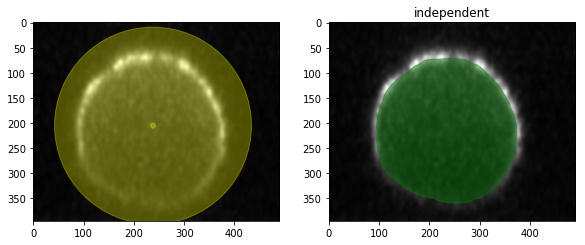

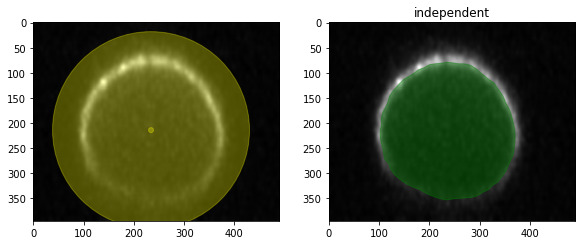

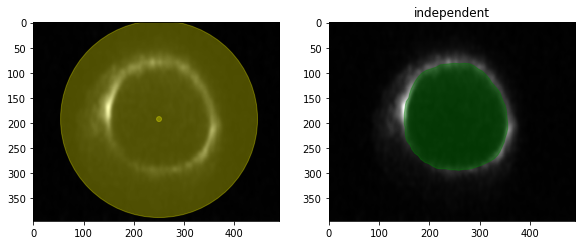

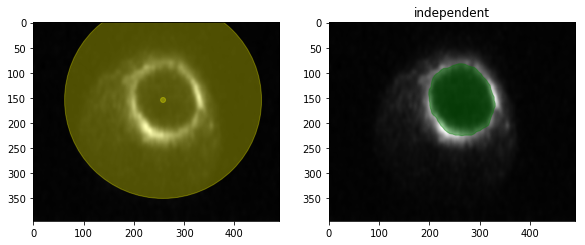

In [28]:
pl.rcParams['figure.figsize'] = (15, 7)

for frame in range(1,len(data.images),len(data.images)/4):
    fig = plt.figure()
    ax = plt.subplot(131)
    data.plot_minmax( frame, ax )
    ax = plt.subplot(132)
    ax.set_title('independent')
    data.plot_result( frame, ax )
    if ( data.netsurf2dt[0] is not None):
        ax = plt.subplot(133)
        ax.set_title('2dt')
        data.plot_2dt_result( frame, ax )

### Export movie frames (if desired)

In [29]:
from moviemaker2d import MovieMaker2d
mm = MovieMaker2d(False)
frames, centers, all_polygones, radii = mm.draw_segmentation(data, stack, folder=None, inline=False)

In [30]:
for f in range(len(frames)):
    imsave(folder+'movie_export/frame%02d.tif'%(f), frames[f])

---

# Data extraction (per segment per timepoint)

### Please define the ring width within intensity data should be extracted

1. define some key frames at which you want to define the with of the annulus within which to measure
1. ```keyframes``` is a list of tuples ```(f,r)```, with ```f``` being a frame index and ```r``` being half the annulus width.
1. make sure to have at least 2 entries, one for frame 0, one for frame ```len(stack)-1```
1. values in ```delta_radius``` are linear interpolatoions of given keyframes such that each frame has its own entry


In [63]:
#keyframes = [(0,15),(len(stack)-1,15)]  # example: radius of 15, all the time
#keyframes = [(0,15),(50,20),(60,25),(len(stack)-1,30)]
keyframes = [(0,20),(len(stack)-1,20)]

assert keyframes[0][0]==0
assert len(keyframes)>=2

delta_radius = []
for i in range(len(keyframes)-1):
    key_from = keyframes[i]
    key_to = keyframes[i+1]
    endpoint = (i>=len(keyframes)-2)
    delta_radius.extend(np.linspace(key_from[1],key_to[1],key_to[0]-key_from[0],endpoint=endpoint, dtype=int))
while len(delta_radius)<len(stack):
    delta_radius.extend([delta_radius[-1]])

#### Definition of helper functions used below

In [64]:
def sector_mask(shape,centre,radius,angle_range):
    """
    Return a boolean mask for a circular sector. The start/stop angles in  
    `angle_range` should be given in clockwise order.
    """

    x,y = np.ogrid[:shape[0],:shape[1]]
    cy,cx = centre
    tmin,tmax = np.deg2rad(angle_range)

    # ensure stop angle > start angle
    if tmax < tmin:
            tmax += 2*np.pi

    # convert cartesian --> polar coordinates
    r2 = (x-cx)*(x-cx) + (y-cy)*(y-cy)
    theta = np.arctan2(x-cx,y-cy) - tmin

    # wrap angles between 0 and 2*pi
    theta %= (2*np.pi)

    # circular mask
    circmask = r2 <= radius*radius

    # angular mask
    anglemask = theta <= (tmax-tmin)

    return circmask*anglemask

### The next cell computes segment masks and extracts data withim them

In [65]:
from __future__ import print_function

centers = []
radii = []
num_segments = data.num_columns

masks_per_frame = []
masked_sum_int_per_frame = []        # is a list (time) of lists (segments)
masked_sum_int_smooth_per_frame = [] # is a list (time) of lists (segments)
masked_pixels_per_frame = []         # is a list (time) of lists (segments)

size_x = np.shape(stack[0])[1]
size_y = np.shape(stack[0])[0]
size_t = len(stack)

for f in range(len(stack)):
    if (f+1) % 10:
        print('.', end='')
    else:
        print('|%.1f%%|'%((f+1)*100.0/len(stack)), end='')
        
    # for each polygone point figure out how it relates to circle position
    center = tuple(data.object_seedpoints[0][f])
    centers.append(center)

    # compute current frame's median radius
    # -------------------------------------
    segment_idxes=[]
    for i in range(num_segments):
        if data.netsurf2dt[0] is None:
            idx = data.netsurfs[0][f].get_surface_index(i)
        else:
            idx = data.netsurf2dt[0].get_surface_index(f, i)
        segment_idxes.extend([idx])
    r = np.median(segment_idxes)
    r /= data.K
    r *= data.object_max_surf_dist[0][f][0] - data.object_min_surf_dist[0][f][0]
    r += data.object_min_surf_dist[0][f][0]
    radii.append(r)

    # compute masks for current frame
    # -------------------------------
    masks = []                     # is not a list (time) of lists (segments)
    masked_pixels = []
    masked_sum_intensities = []
    masked_sum_intensities_smooth = []
    cx, cy = center
    dr = delta_radius[f]
    r_inner = r-dr
    r_outer = r+dr
    for i in range(num_segments):
        seg_degrees = 360.0/num_segments
        seg_min_deg = i*seg_degrees - seg_degrees/2
        seg_max_deg = i*seg_degrees + seg_degrees/2
        mask1 = sector_mask(stack[f].shape,center,r_outer,(seg_min_deg,seg_max_deg)) #x*x + y*y <= r_outer*r_outer 
        mask2 = sector_mask(stack[f].shape,center,r_inner,(seg_min_deg,seg_max_deg)) #x*x + y*y >= r_inner*r_inner
        mask = mask1 & ~mask2
        
        masked_sum_intensities.append(np.sum(stack[f]*mask))
        masked_sum_intensities_smooth.append(np.sum(stack_smooth[f]*mask))
        
        masked_pixels.append(np.sum(mask))
        masks.append( mask )
        
    masks_per_frame.append(masks)
    masked_pixels_per_frame.append(masked_pixels)
    masked_sum_int_per_frame.append(masked_sum_intensities)
    masked_sum_int_smooth_per_frame.append(masked_sum_intensities_smooth)
print(' done!', end='')

.........|13.2%|.........|26.3%|.........|39.5%|.........|52.6%|.........|65.8%|.........|78.9%|.........|92.1%|...... done!

### Extract the segment distances per frame

In [70]:
segment_radii_over_time = []   # is a list (time) of lists (segments)

for f in range(len(stack)):
    center = centers[f]
    r = radii[f]
    segment_radii = []
    
    polygone = None
    if data.netsurf2dt[0] is None:
        polygone = data.get_result_polygone(0, f)
    else:
        polygone = data.get_result_polygone_2dt(0, f)
    
    for p in polygone:
        d = math.sqrt( (p[0]-center[0])**2 + (p[1]-center[1])**2 )
        segment_radii.append(d-r)
        
    segment_radii_over_time.append(segment_radii)

### Transposing extracted data (from per-frame to over-time)

In [74]:
segment_sum_int_over_time = list(zip(*masked_sum_int_per_frame))
segment_sum_int_smooth_over_time = list(zip(*masked_sum_int_smooth_per_frame))
segment_area_over_time = list(zip(*masked_pixels_per_frame))
segment_radii_per_frame = list(zip(*segment_radii_over_time))

#### DEBUG: show first and last mask, every second segment in it -- this is only necessary for debugging 

In [75]:
# masksum = np.zeros_like(masks_per_frame[0][0])
# i=0
# for mask in masks_per_frame[0]:
#     if i % 2:
#         masksum += mask
#     i+=1
# i=1
# for mask in masks_per_frame[-1]:
#     if i % 2:
#         masksum += mask
#     i+=1
# pyplot.imshow(masksum)

### Yet another sanity check

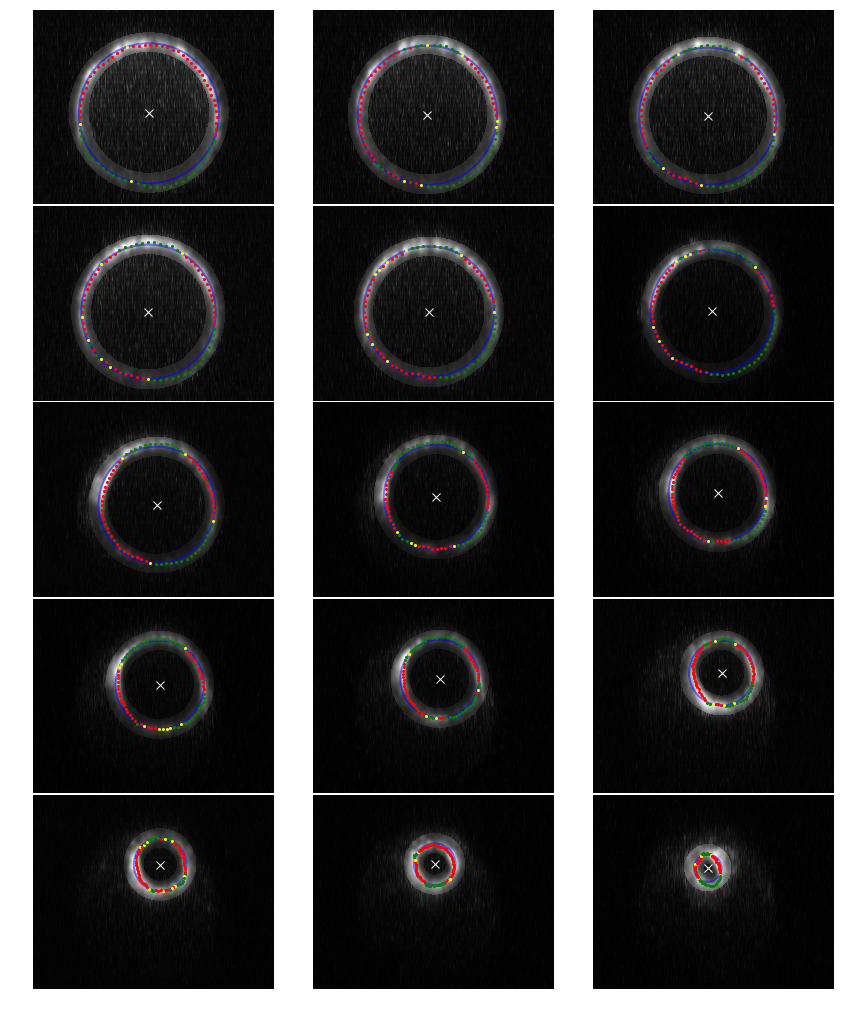

In [76]:
import math

plotsx=3
plotsy=5

figheight=15
fig, axs = pl.subplots(plotsy, plotsx, figsize=(figheight, int(figheight*(float(size_x)/size_y))))
fig.subplots_adjust(hspace = .01, wspace=.01)
axs = axs.ravel()

for i,f in enumerate(np.linspace(1,len(stack)-1,num=(plotsx*plotsy),dtype=int)):
    ax = axs[i]
    ax.axis('off')
    
    center = centers[f]
    r = radii[f]
    mask = np.zeros_like(masks_per_frame[f][0])
    for segment_mask in masks_per_frame[f]:
        mask += segment_mask 
    
    # PLOTTING BUSINESS

    # get all segmentation polygones for frame f (there is only one, but still)
    polygone = None
    if data.netsurf2dt[0] is None:
        polygone = data.get_result_polygone(0, f)
    else:
        polygone = data.get_result_polygone_2dt(0, f)
    
    # image data mashup
    tmp = np.maximum(stack_smooth[f]*mask, .6*stack[f]*np.logical_not(mask))
    ax.imshow(tmp, plt.get_cmap('gray'))
    
    # center point
    ax.plot([center[0]], [center[1]], marker='x', markersize=8, color="white")
    
    # circle
    circle = pl.Circle(center, r, color='b', fill=False, lw=2, alpha=0.5)
    ax.add_artist(circle)
    
    # color dots
    for j,p in enumerate(polygone):
        delta_d = segment_radii_over_time[f][j]
        if (round(delta_d) > 0):
            ax.plot([p[0]], [p[1]], marker='.', markersize=4, color="green")
        else:
            if (round(delta_d) < 0):
                ax.plot([p[0]], [p[1]], marker='.', markersize=4, color="red")
            else:
                ax.plot([p[0]], [p[1]], marker='.', markersize=4, color="yellow")

### Summary: what data was extracted and where can you find it?

```num_segments``` is the number of segments used during segmentation and data extraction.

```centers[f]``` is the center of the segmented ring for frame ```f```.

```radii[f]``` is the median radius of the segmented ring for frame ```f```.

```masks_per_frame[f]``` contains all bitmap masks used to extract data (just so you can check if you want).

```masked_pixels_per_frame[f]``` is a list containing the number of pixels (the area) per segment mask.

```masked_sum_int_per_frame[f]``` is a list of summed image intensities per segment mask (extracted from RAW images).

```masked_sum_int_smooth_per_frame[f]``` is a list of summed image intensities per segment mask (extracted from smoothed images).

```segment_sum_int_over_time[s]``` is a list of summed image intensities over timepoints (extracted from RAW images).

```segment_sum_int_smooth_over_time[s]``` is a list of summed image intensities over timepoints (extracted from smoothed images).

```segment_area_over_time[s]``` is a list of segment area (in pixels) over timepoints.

```segment_radii_over_time[f]``` is a list values that denote the divergence of the segmentation from the median radius per segment.

```segment_radii_per_frame[s]``` is a list values that denote the divergence of segment s from the median radius per frame.

### Plot some data to see if it makes sense

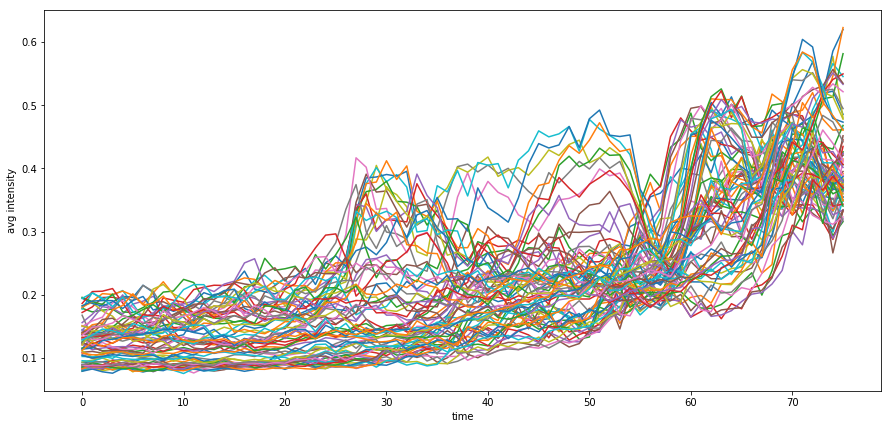

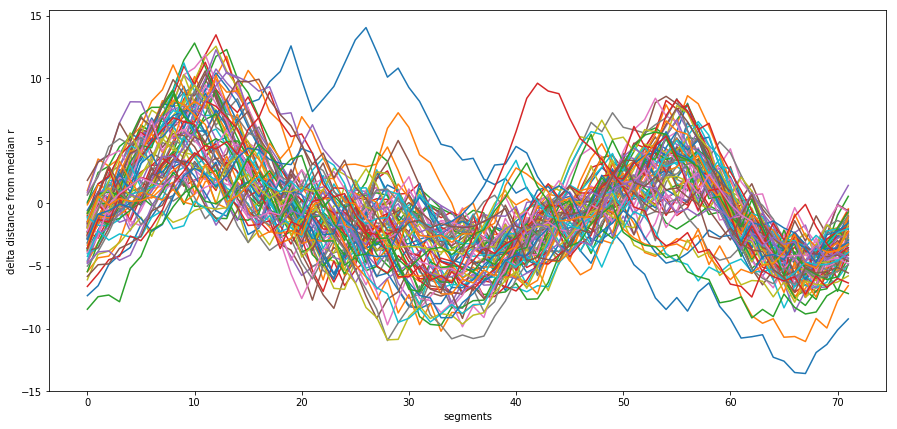

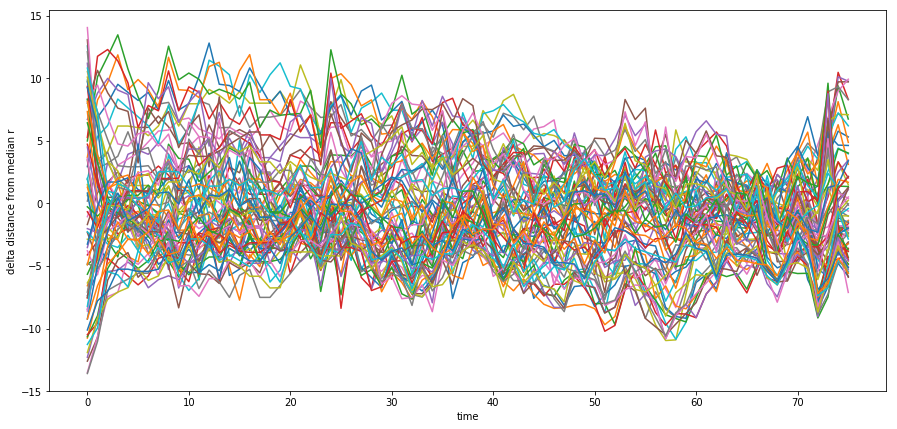

In [77]:
# plot normalized raw intensities per segment over time
fig = pl.figure()
for s in range(len(segment_sum_int_over_time)):
    pl.plot(np.divide(segment_sum_int_over_time[s],segment_area_over_time[s]))
    pl.xlabel('time')
    pl.ylabel('avg intensity')
    
# plot segment_radii_over_time
fig = pl.figure()
for segment_radii in segment_radii_over_time:
    pl.plot(segment_radii)
    pl.xlabel('segments')
    pl.ylabel('delta distance from median r')
    
# plot segment_radii_per_frame
fig = pl.figure()
for segment_radii_for_segment in segment_radii_per_frame:
    pl.plot(segment_radii_for_segment)
    pl.xlabel('time')
    pl.ylabel('delta distance from median r')

---

# Export data in CSV files

In [83]:
import csv
 
ofile  = open(folder+'data_export/test.csv', 'wb')
writer = csv.writer(ofile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
 
writer.writerow(['num_segments', num_segments])
writer.writerow(centers)
writer.writerow(radii)

for f in range(len(stack)):
    writer.writerow(['frame', f])
    writer.writerow(masked_pixels_per_frame[f])
    writer.writerow(masked_sum_int_per_frame[f])
    writer.writerow(masked_sum_int_smooth_per_frame[f])
    writer.writerow(segment_radii_over_time[f])
    
ofile.close()